In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

from MediaDecomposition import ModelSpec, MediaDecomposition
from Definitions import *

# 1. Data file

In [2]:
model_data = pd.read_csv('17217_data.csv')
model_data = model_data.fillna(0) 
model_data.head()

,Respondent_Serial,SM_GPID,Pre_Post,yyyymmdd,WEEK,SEX,AGEBANDS,Region,Region2,SEG,...,Noodle_Eaters,tv_fr,onl_fr,tv_onl,bloger,ex2pbp,wom2pbp,mc2pbp,wave,wave1
0,100008,514226cb-13e3-4185-90ac-b88ea6f73c8b,1,20230620,202325,1,2,3,2,6,...,1,3,0,0,0,1,1,0,1.0,1.0
1,100009,3b825e32-315e-475a-a48c-a0cfd4d01db2,1,20230620,202325,2,2,3,2,4,...,1,0,0,0,0,1,1,0,1.0,1.0
2,100011,cd4069b9-a961-4c2d-bc0e-e922db4507f1,1,20230620,202325,1,2,3,2,4,...,1,30,0,0,0,1,1,0,1.0,1.0
3,100012,d98fd1ae-b370-417b-ad5b-3bce01c34095,1,20230620,202325,2,2,3,2,6,...,1,20,0,0,0,1,1,0,1.0,1.0
4,100013,08a7ac20-861e-45ab-9de6-a24459540e5b,1,20230620,202325,2,2,3,2,4,...,1,10,0,0,0,1,0,0,1.0,1.0


# 2. Model Spec

In [5]:
# списки переменных для моделирования

targets = [
'TOM_01', 'TotalUnaided_01', 'COMAW_01', 
'KPIA_01', 'KPIB_01', 'KPIC_01', 'KPID_01', 'KPIE_01', 'KPIF_01', 'KPIH_01', 'KPII_01', 'KPIJ_01', 
'MostOften_01', 'Regular_Buyers_Brand1', 'Tried_01', 'Consideration_TopBox_01', 
'Prompted_BBW', 'MostOften_BBW', 'Regular_BBW', 'Trial_BBW', 'Consideration_Top1_BBW', 
] 

#camp = ['tv_fr', 'onl_fr', 'tv_onl', 'bloger'] 
camp = ['tv_fr', 'onl_fr', 'bloger'] 

#non_camp = ['MC2P', 'WOM2P', 'EX2P']
non_camp = ['ex2pbp','wom2pbp', 'mc2pbp']

rg_vars = ['BB_regular_buyers', 'Noodle_frequent_buyers', 'Noodle_Eaters']

report_splits = ['SEX', 'AGEBANDS',  'Region', 'wave1']

# первая спецификация модели 

model_spec = ModelSpec().FromLists(
    targets=targets, 
    media=camp,
    non_media=non_camp, 
    relevance_groups=None,
    report_splits=report_splits
)

model_spec.ValidateSpecVsData(model_data) 

True

In [3]:
#targets = ['TOM_01', 'TotalUnaided_01', 'COMAW_01'] 
targets = ['TOM_01', 'COMAW_01'] 
camp = ['tv_fr', 'onl_fr', 'bloger'] 
#camp = ['tv_fr', 'onl_fr', 'tv_onl']
#non_camp = ['ex2pbp','wom2pbp', 'mc2pbp']
non_camp = ['MC2', 'WOM2', 'EX2']
rg_vars = ['Noodle_frequent_buyers', 'Noodle_Eaters']
report_splits = ['SEX', 'AGEBANDS',  'Region']

model_spec = ModelSpec().FromLists(
    targets=targets, 
    media=camp,
    non_media=non_camp, 
    relevance_groups=None,
    report_splits=report_splits
)

print(model_spec)
model_spec.ValidateSpecVsData(model_data)

{'Target variables': ['TOM_01', 'COMAW_01'], 'Media variables': ['tv_fr', 'onl_fr', 'bloger'], 'Non-media variables': ['MC2', 'WOM2', 'EX2'], 'Relevance groups variable': None, 'Report split variables': ['SEX', 'AGEBANDS', 'Region']}


True

# Contributions 

sample: 100%|██████████████████████████| 3000/3000 [00:08<00:00, 343.67it/s, 31 steps of size 1.91e-01. acc. prob=0.93]


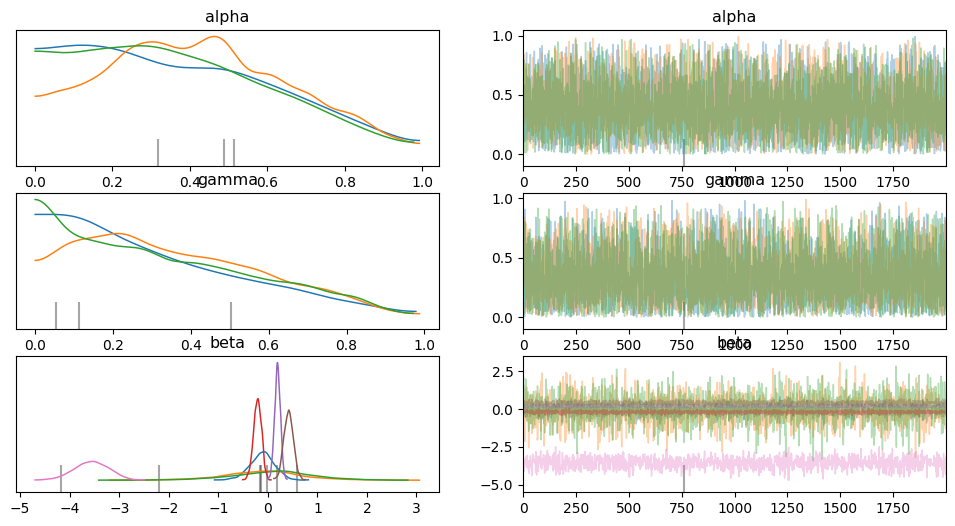

sample: 100%|██████████████████████████| 3000/3000 [00:09<00:00, 329.11it/s, 15 steps of size 2.65e-01. acc. prob=0.86]


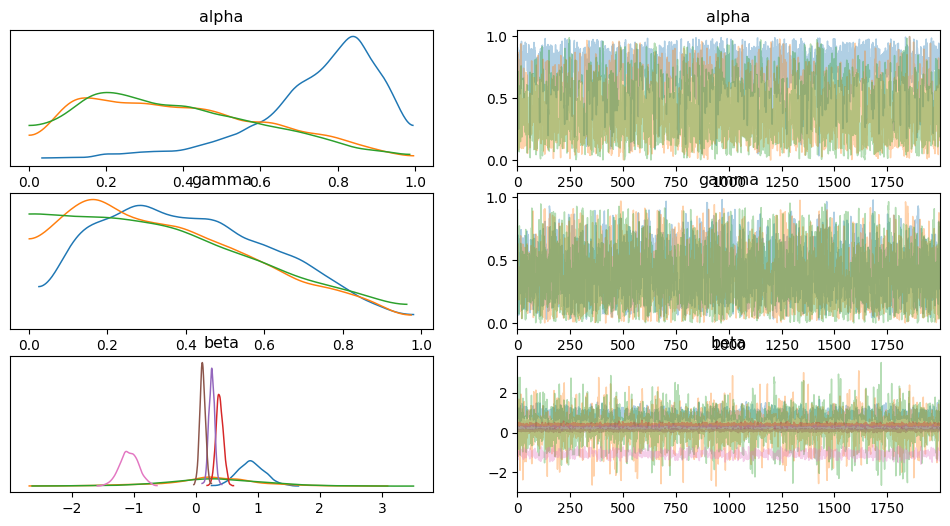

In [4]:
xmc = MediaDecomposition()
xmc.Fit(model_spec, model_data, show_traces=True)

In [5]:
res = xmc.Contributions()
res

TOM_01  COMAW_01
Total      Base       0.027381  0.255121
           Non-media  0.076969  0.169086
           tv_fr      0.000000  0.050336
           onl_fr     0.000000  0.002097
           bloger     0.000650  0.000859
           Observed   0.105000  0.477500
SEX_1      Base       0.028275  0.260857
           Non-media  0.079467  0.184338
           tv_fr      0.000000  0.051864
           onl_fr     0.000000  0.002047
           bloger     0.000592  0.000894
           Observed   0.108333  0.500000
SEX_2      Base       0.026489  0.249102
           Non-media  0.074474  0.154163
           tv_fr      0.000000  0.048770
           onl_fr     0.000000  0.002140
           bloger     0.000703  0.000824
           Observed   0.101667  0.455000
AGEBANDS_1 Base       0.020279  0.264732
           Non-media  0.055828  0.185335
           tv_fr      0.000000  0.053399
           onl_fr     0.000000  0.002186
           bloger     0.000560  0.001014
           Observed   0.076667  0.506667
AGEBANDS_2 Base       0.034286  0.245067
           Non-media  0.098366  0.153277
           tv_fr      0.000000  0.047272
           onl_fr     0.000000  0.002005
           bloger     0.000681  0.000712
           Observed   0.133333  0.448333
Region_1   Base       0.040906  0.263860
           Non-media  0.113084  0.187639
           tv_fr      0.000000  0.057910
           onl_fr     0.000000  0.002467
           bloger     0.001182  0.001055
           Observed   0.155172  0.512931
Region_2   Base       0.017603  0.235613
           Non-media  0.048023  0.116724
           tv_fr      0.000000  0.029868
           onl_fr     0.000000  0.002021
           bloger     0.000309  0.000390
           Observed   0.065934  0.384615
Region_3   Base       0.024847  0.254488
           Non-media  0.070363  0.169830
           tv_fr      0.000000  0.050581
           onl_fr     0.000000  0.002006
           bloger     0.000572  0.000860
           Observed   0.095781  0.477765